# Tourism Dataset

The dataset contains 5989 records with tourist information. Key columns include:

__Location__: A ten- -character random string that represents the location's name.    
__Nation__: Selectively selected from a roster of nations.     
__Type__: Selectively selected from a range of travel-related categories.    
__Visitor count__: A random integer value that indicates how many people have visited.     
__Rating__: A random float number in the range of 1.0 and 5.0 is used to indicate the rating.      
__Revenue__: A float value chosen at random to indicate the revenue received.     
__Accommodation_Available__: Returns a value of "Yes" or "No" depending on the availability of accomodation.    
__Target Size__: During the loop, the file size is measured and rows are added until the file size reaches roughly 310.43 KB.   

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [6]:
df=pd.read_csv("tourism_dataset.csv")
df

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No
...,...,...,...,...,...,...,...
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB


In [11]:
df.isnull().sum()

Location                   0
Country                    0
Category                   0
Visitors                   0
Rating                     0
Revenue                    0
Accommodation_Available    0
dtype: int64

### descriptive statistic

In [13]:
df.describe()

,Visitors,Rating,Revenue
count,5989.000000,5989.000000,5989.000000
mean,501016.089497,3.009347,499479.367253
std,289783.294978,1.155980,286743.225211
min,1108.000000,1.000000,1025.810000
25%,252789.000000,2.010000,251410.450000
50%,500831.000000,3.000000,494169.350000
75%,751371.000000,4.010000,742241.240000
max,999982.000000,5.000000,999999.490000


# EDA

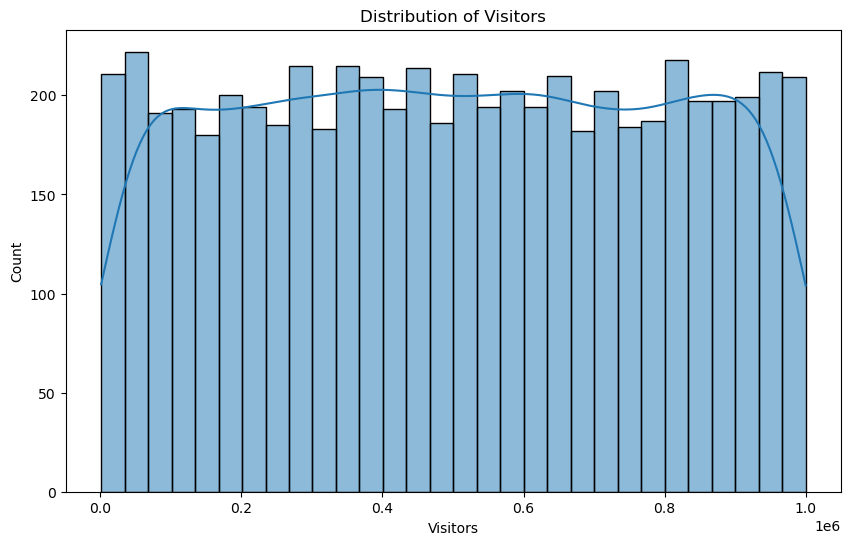

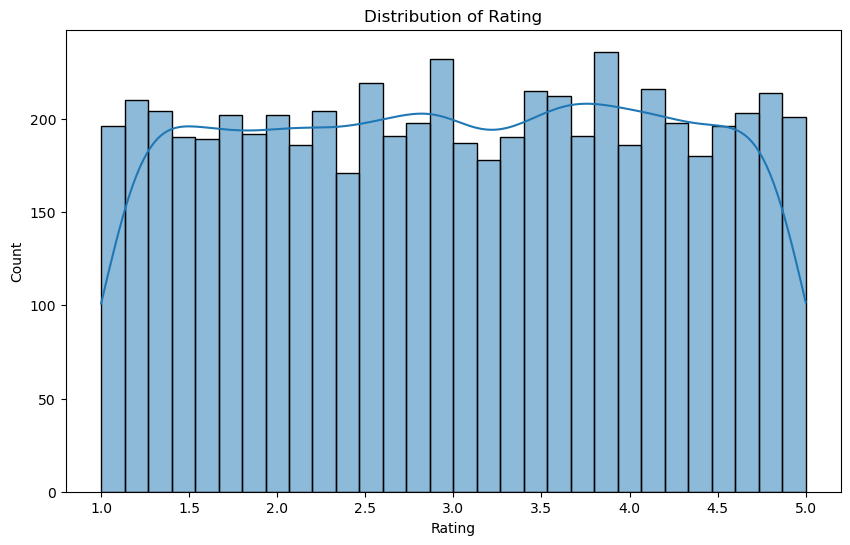

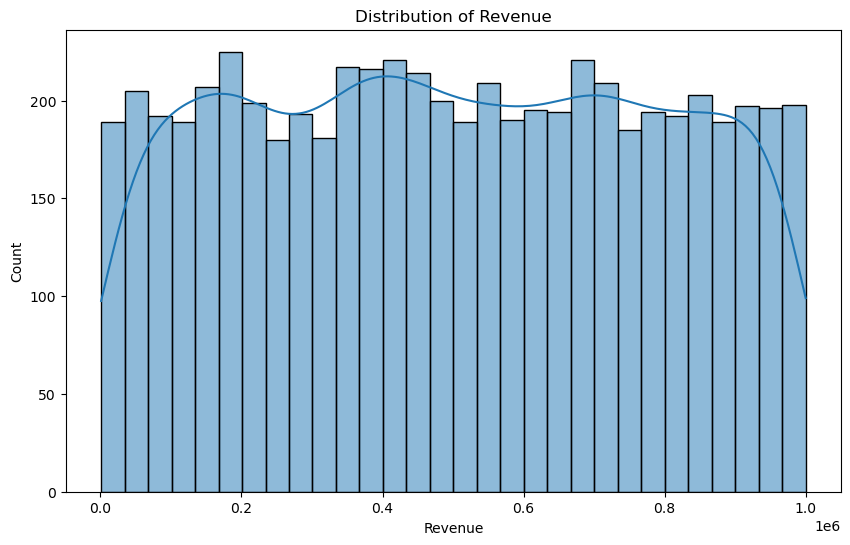

In [17]:
# Distribution plots for numerical columns
numerical_cols = ['Visitors', 'Rating', 'Revenue']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

### distribution of categorical features

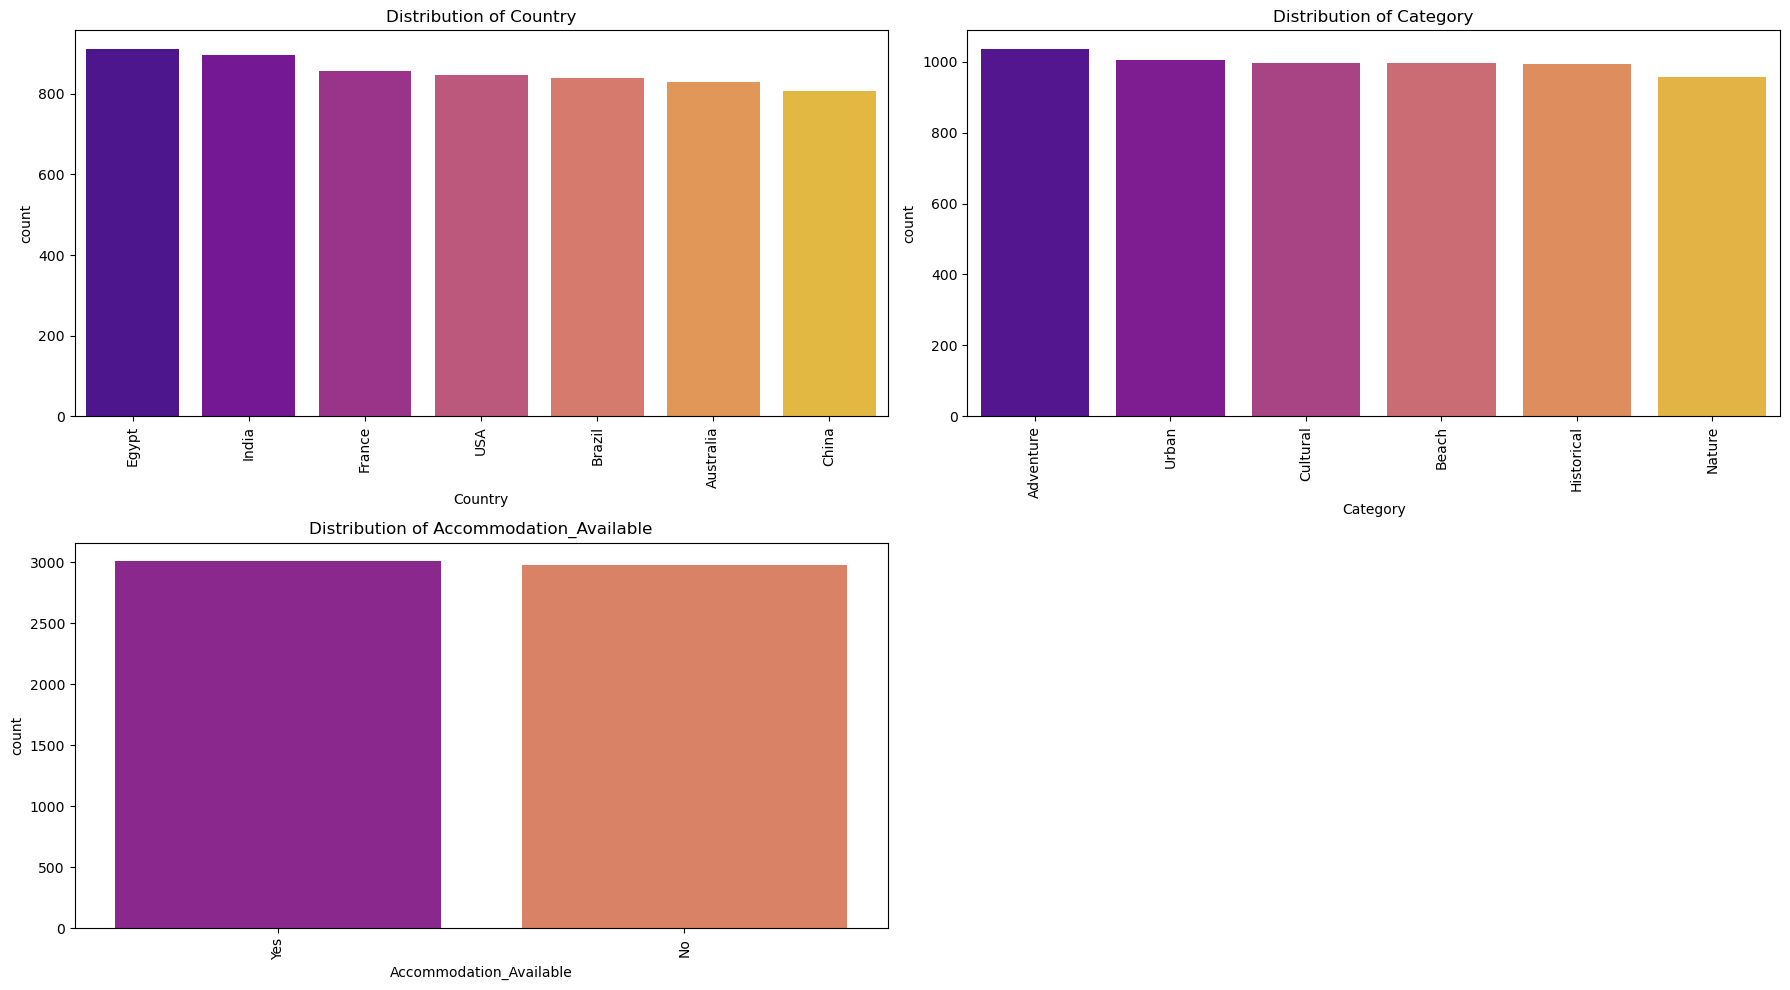

In [44]:
# Plot distribution of categorical features
categorical_features = ['Country', 'Category', 'Accommodation_Available']


plt.figure(figsize=(18, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    
    sns.countplot(
        data=df, 
        x=feature, 
        order=df[feature].value_counts().index, 
        palette= 'plasma' 
    )
    
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Total of Visitors by Country and Category

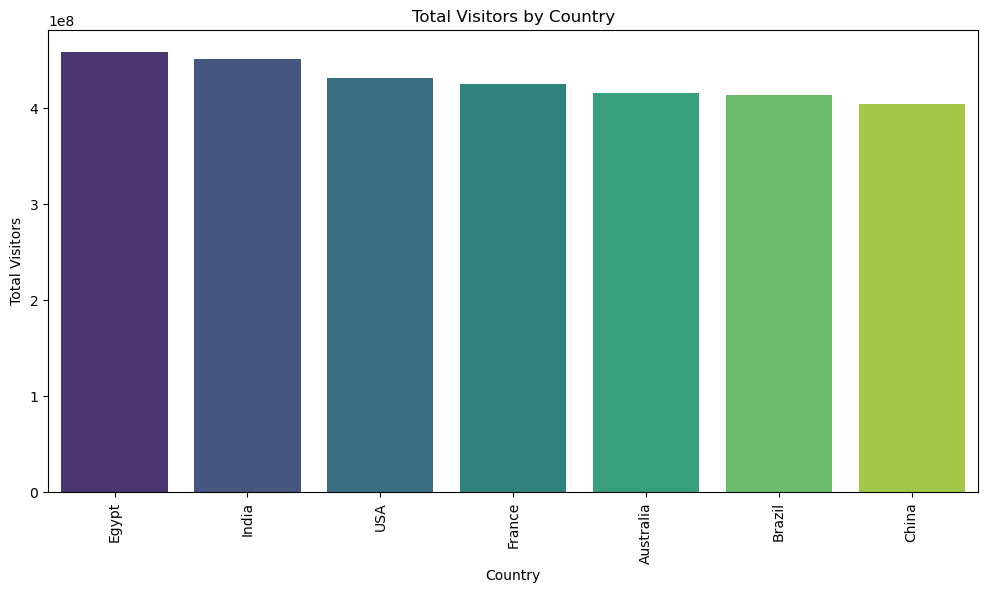

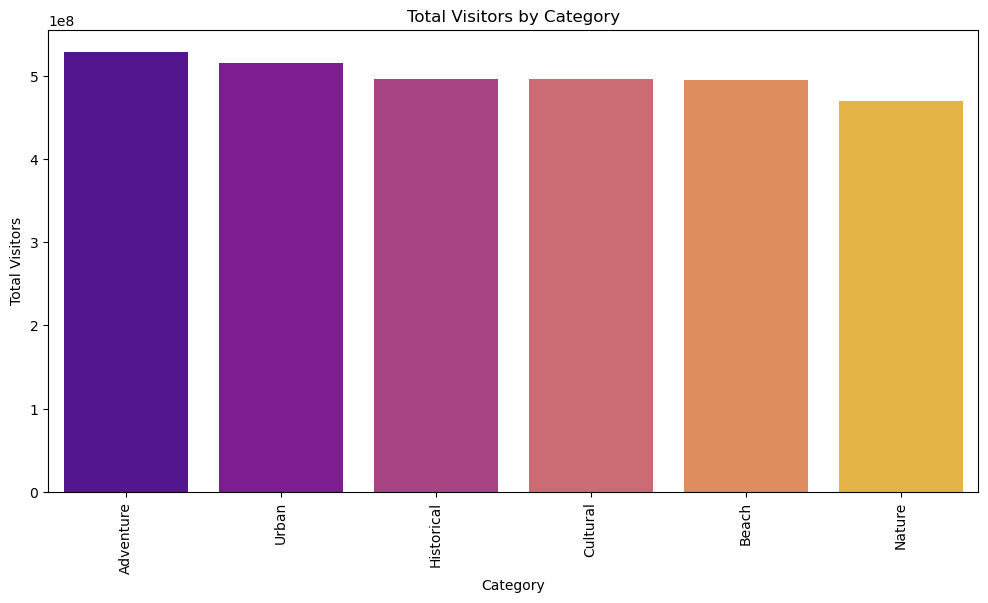

In [46]:
# Visitors by Country
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x='Country', 
    y='Visitors', 
    estimator=sum, 
    ci=None, 
    order=df.groupby('Country')['Visitors'].sum().sort_values(ascending=False).index,
    palette="viridis"  # Paleta de cores para variar as barras
)
plt.title('Total Visitors by Country')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.show()

# Visitors by Category
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x='Category', 
    y='Visitors', 
    estimator=sum, 
    ci=None, 
    order=df.groupby('Category')['Visitors'].sum().sort_values(ascending=False).index,
    palette="plasma"  # Outra paleta de cores
)
plt.title('Total Visitors by Category')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Visitors')
plt.show()

### Total Revenue by Country and Category

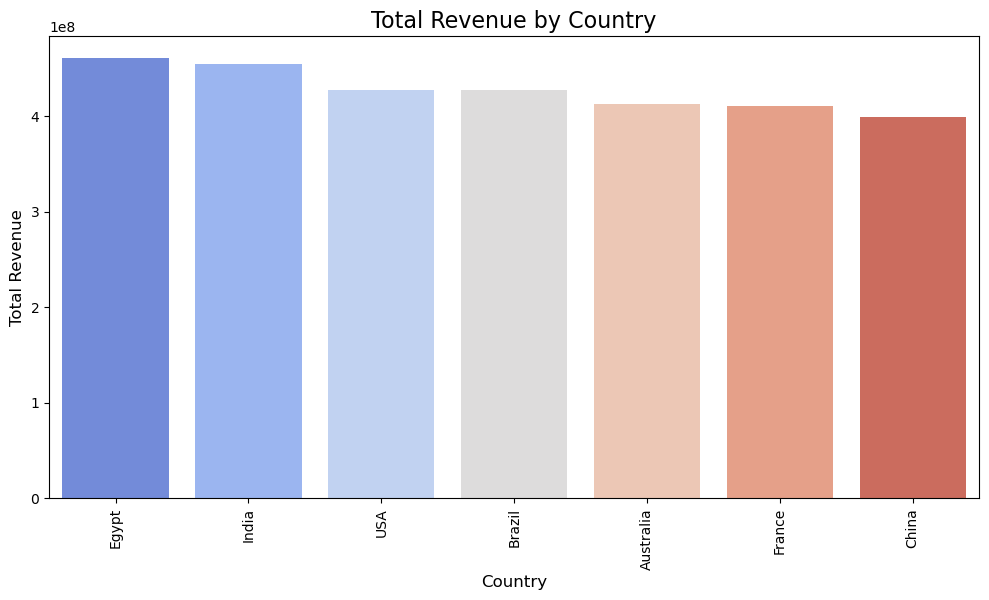

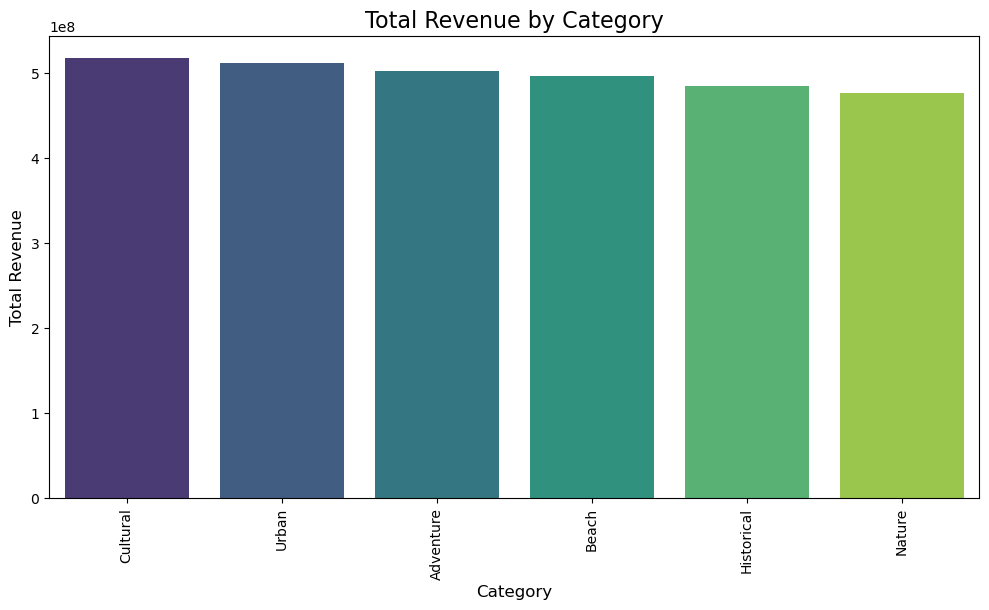

In [49]:
# Revenue by Country
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x='Country', 
    y='Revenue', 
    estimator=sum, 
    ci=None, 
    order=df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).index,
    palette="coolwarm"  # Paleta para barras coloridas
)
plt.title('Total Revenue by Country', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

# Revenue by Category
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, 
    x='Category', 
    y='Revenue', 
    estimator=sum, 
    ci=None, 
    order=df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).index,
    palette="viridis"  # Paleta de cores alternativa
)
plt.title('Total Revenue by Category', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.show()

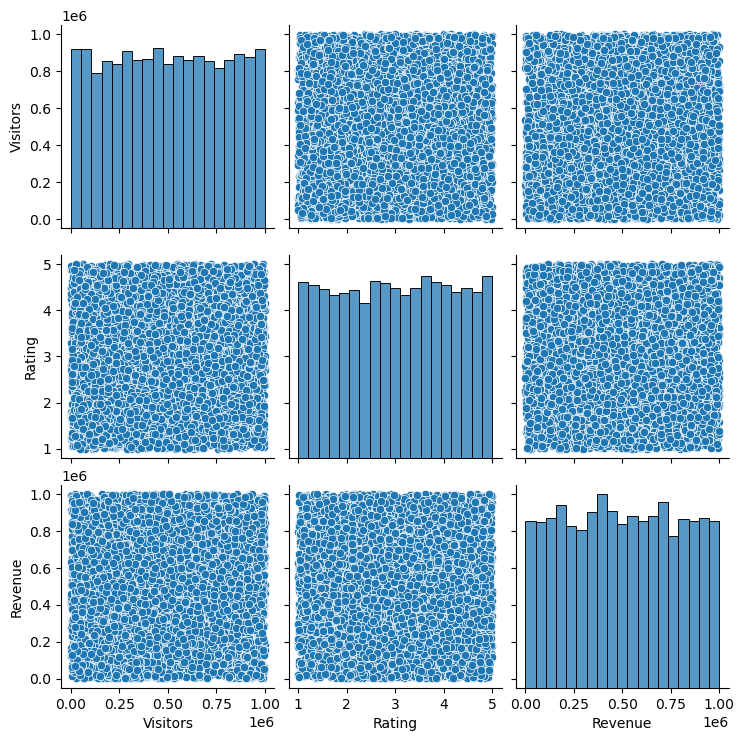

In [55]:
# Pairplot
sns.pairplot(df[numerical_cols])
plt.show()

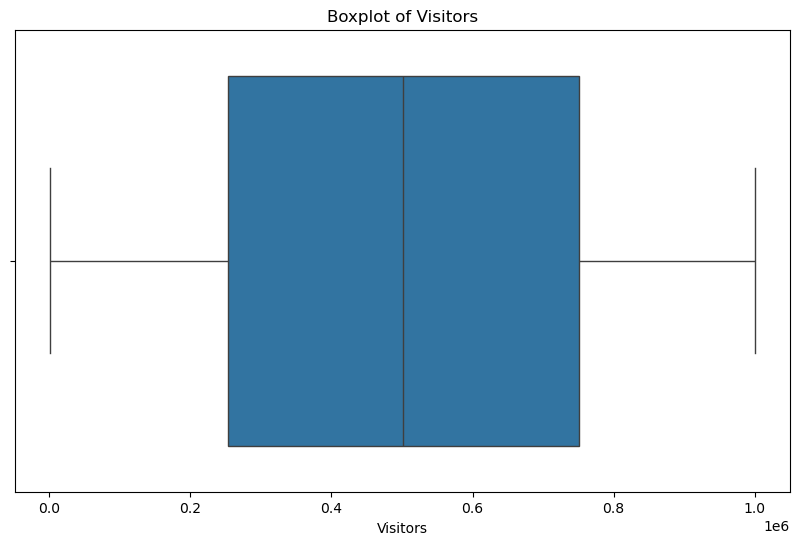

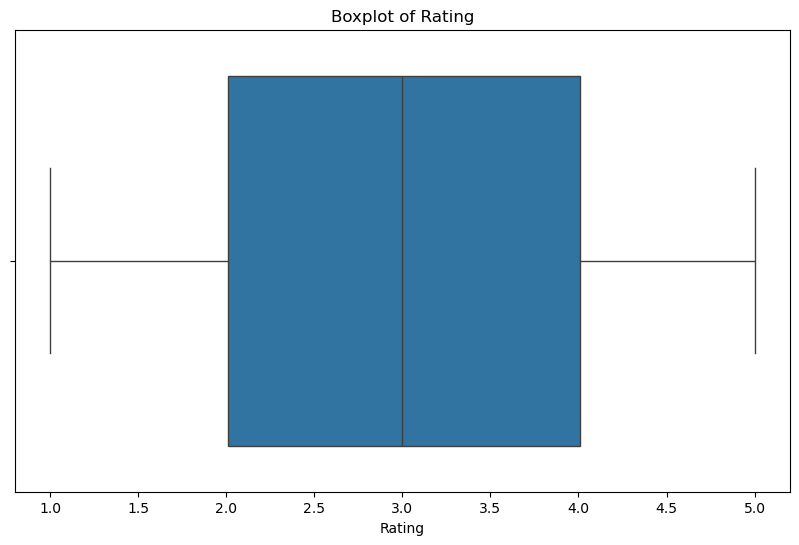

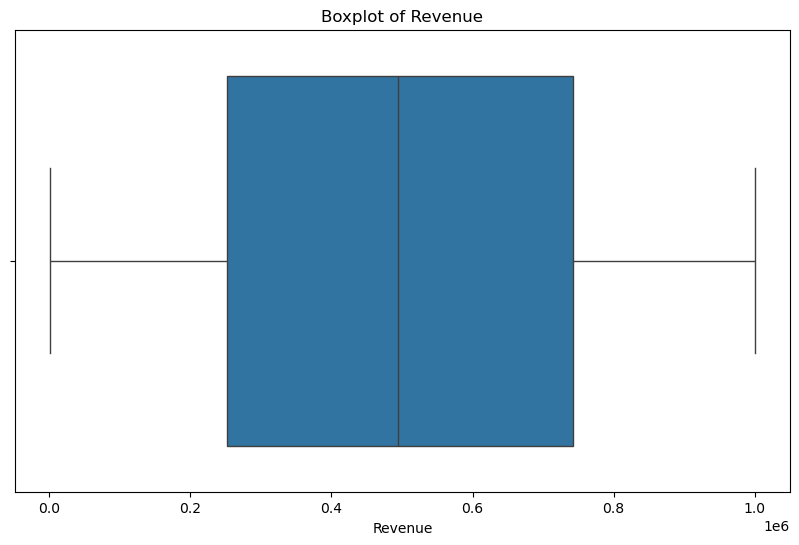

In [58]:
# Boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Feature Engineering

### **preprocessing**

### Ad-Hoc

In [76]:
# Prepare data for modeling
X = df[['Country', 'Category', 'Visitors', 'Rating', 'Revenue', 'Accommodation_Available']]
X = pd.get_dummies(X, drop_first=True) 

### Normalize numerical features

In [78]:
# Normalize numerical features
numerical_features = ['Visitors', 'Revenue', 'Rating']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

### Encode categorical features

In [80]:
# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

### Combine preprocessing steps

In [82]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(X)

# **Model**

### Train/Split data

In [93]:
# Prepare data for modeling
y = df['Visitors']  

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define model

In [95]:
# Define model
rf = RandomForestRegressor()

### Define parameter grid

In [97]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [99]:
# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [108]:
# Make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model

In [110]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 28304.08853290628
R-squared: 0.9999996604543289


### Calculate residuals

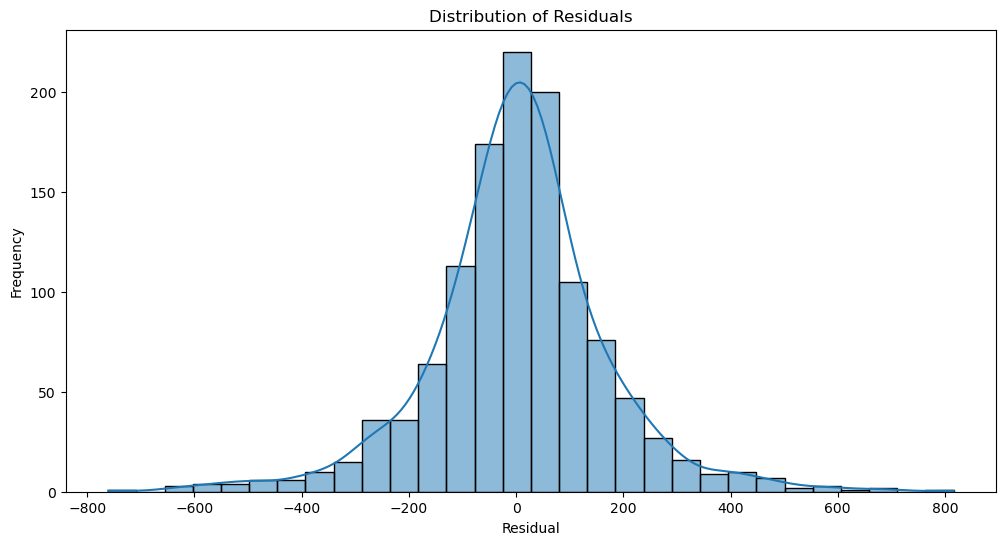

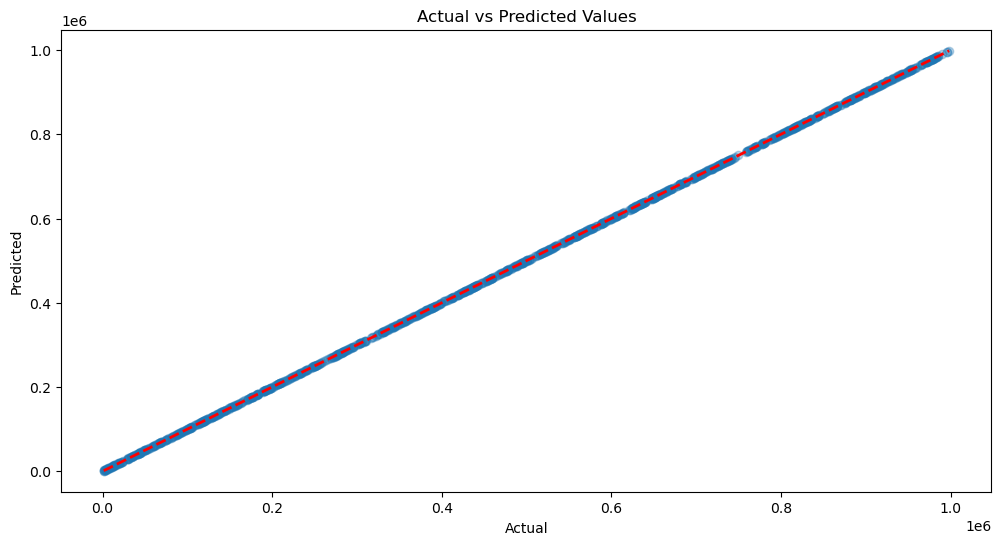

In [114]:
 # Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

### Perform cross-validation

In [116]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')

print(f"Cross-validation R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {cv_scores.mean()}")
print(f"Standard deviation of R-squared scores: {cv_scores.std()}")


Cross-validation R-squared scores: [0.9999997  0.99999976 0.99999969 0.99999969 0.99999973]
Mean R-squared score: 0.9999997139013594
Standard deviation of R-squared scores: 2.6202229396188526e-08
